In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import cv2 as cv

cv.imread('../data/Arjantin/IMG_1188.JPG').shape

(512, 512, 3)

In [3]:
data_path = "../data/"
train_df = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    image_size=(512, 512),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=123)

Found 120 files belonging to 6 classes.
Using 96 files for training.


In [4]:
val_df = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    image_size=(512, 512),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=123)

Found 120 files belonging to 6 classes.
Using 24 files for validation.


In [5]:
class_names = train_df.class_names
class_names

['Arjantin', 'Buchkeygala', 'Galaval', 'Golden', 'Joremin', 'Superchief']

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


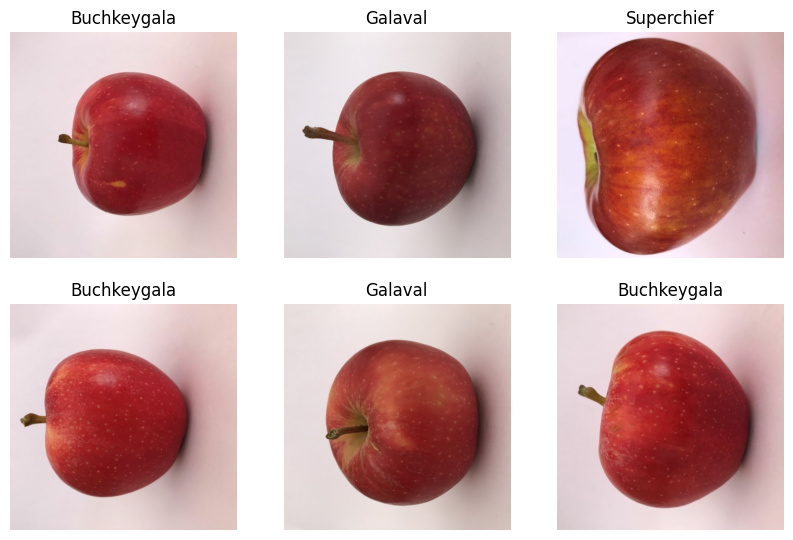

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_df.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    print(labels[i])
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
resnet_model = tf.keras.Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(512, 512, 3),
    classes=6,
    pooling='avg')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dense(6, activation='softmax'))




94765736/94765736 [==============================] - 18s 0us/step


In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 24639878 (93.99 MB)
Trainable params: 1052166 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [9]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
epochs=30
history = resnet_model.fit(
  train_df,
  validation_data=val_df,
  epochs=epochs
)

Epoch 1/30


3/3 [==============================] - 44s 13s/step - loss: 2.4917 - accuracy: 0.3125 - val_loss: 1.0338 - val_accuracy: 0.6250
Epoch 2/30
3/3 [==============================] - 32s 12s/step - loss: 1.0233 - accuracy: 0.6667 - val_loss: 1.0778 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 32s 11s/step - loss: 0.6287 - accuracy: 0.7708 - val_loss: 0.3404 - val_accuracy: 0.9583
Epoch 4/30
3/3 [==============================] - 32s 12s/step - loss: 0.2623 - accuracy: 0.9688 - val_loss: 0.6014 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 30s 11s/step - loss: 0.2456 - accuracy: 0.9479 - val_loss: 0.4472 - val_accuracy: 0.7917
Epoch 6/30
3/3 [==============================] - 30s 11s/step - loss: 0.1127 - accuracy: 0.9896 - val_loss: 0.2690 - val_accuracy: 0.9583
Epoch 7/30
3/3 [==============================] - 31s 11s/step - loss: 0.1163 - accuracy: 0.9688 - val_loss: 0.2271 - val_accuracy: 0.9583
Epoch 8/30
3/3 [=========

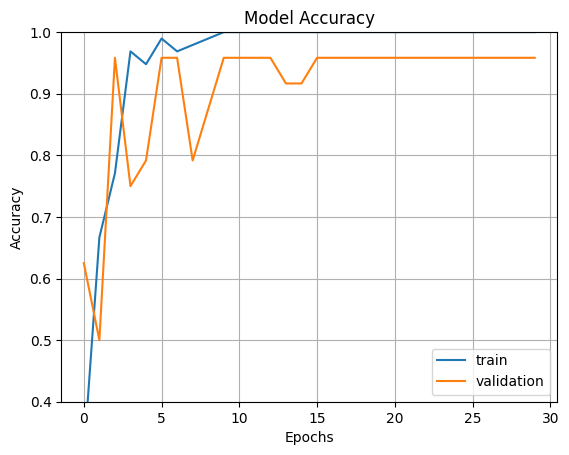

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

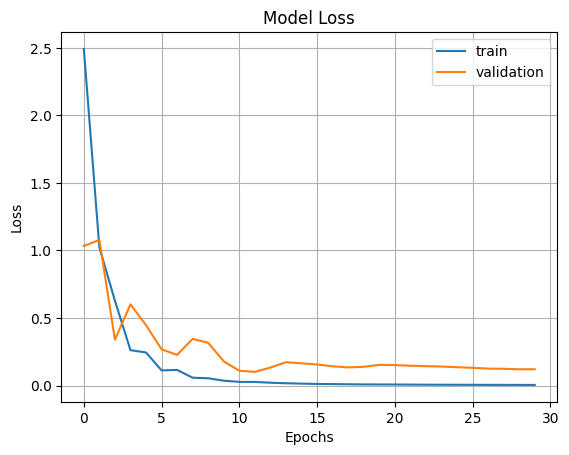

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

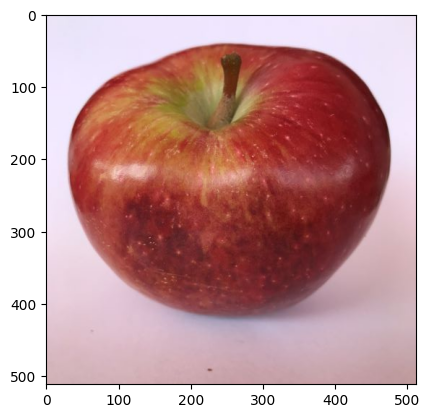

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

pic_path = "../data/Superchief/"
img = os.path.join(pic_path, os.listdir(pic_path)[11])
image = cv2.imread(img)
image = cv2.resize(image, (512, 512))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [16]:
image=np.expand_dims(image,axis=0)
print(image.shape)
pred=resnet_model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

(1, 512, 512, 3)
1/1 [==============================] - 0s 347ms/step
[[1.8302305e-04 4.1435540e-01 1.8981451e-04 3.2862533e-06 7.2049681e-04
  5.8454800e-01]]
The predicted class is Superchief
